In [7]:
from scipy import stats
import pandas as pd
train=pd.read_csv('best_14_train_rossvalid.csv', header=0)
survival_gt = train['Survival']
pred = train['Pred']
SE = train['SE']

In [8]:
stats.spearmanr(survival_gt,pred)

SpearmanrResult(correlation=0.40940557433934144, pvalue=1.3191559659327497e-09)

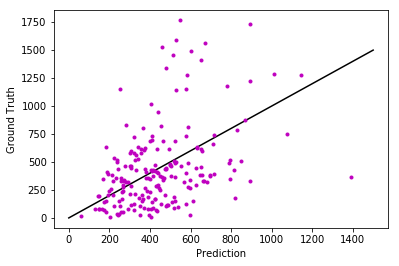

In [49]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1500,1500)
y = x
plt.plot(x, y, '-k')
plt.plot(pred, survival_gt, 'm.')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.savefig("distribution.pdf")
plt.show();


In [32]:
from sklearn.metrics import accuracy_score
def categorize(array):
    new_array=np.zeros_like(array)
    for i in range(0,array.shape[0]): 
        k=array[i]
        #print(k)
        if k>450:
            new_array[i,:]=2
        elif 300<k<450 :
            new_array[i,:]=1
        else: 
            new_array[i,:]=0
    return new_array

predictions = categorize(pred.values.reshape(-1,1))
gt = categorize(survival_gt.values.reshape(-1,1))
accuracy = accuracy_score(gt, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 42.86%


In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(survival_gt,pred)

In [51]:
r_value

0.4115552664594429

In [53]:
std_err

0.036357464638193844